# Data Loader

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder_str = "./Numeric-Record-Delta_0p15/"

data_HDoC = pd.read_csv(folder_str + "HDoC_Kano.csv")
data_LUCB_G = pd.read_csv(folder_str + "LUCB_G_Kano.csv")
data_Adapted_TaS = pd.read_csv(folder_str + "Adapted_TaS_new.csv")
data_MS = pd.read_csv(folder_str + "MS.csv")
data_lilHDoC = pd.read_csv(folder_str + "lilHDoC.csv")

# beta_k_ = lambda x: 2**x / 4, delta_k_ = lambda x: 1 / 3**x
data_SEE_recycle = pd.read_csv(folder_str + "SEE_recyclebeta_0.5-delta_0.3333333333333333.csv") 

In [2]:
data_list = [
    data_SEE_recycle,
    data_HDoC,
    data_LUCB_G,
    data_Adapted_TaS,
    data_lilHDoC,
    data_MS
]
for data in data_list:
    print(data["agent"].iloc[0])

SEE_recycle
HDoC_Kano
LUCB_G_Kano
Adapted_TaS_new
lilHDoC
MS


In [3]:
data_SEE_recycle.columns

Index(['K', 'n_experiment', 'delta', 'instance_type', 'env', 'agent',
       'success_rate', 'reward_array', 'mean_stop_times', 'std_stop_times',
       'delta_k_', 'beta_k_', 'alpha_k_', 'forced-stop', 'count_exceed_stop',
       'count_success'],
      dtype='object')

In [4]:
beta_string = data_SEE_recycle["beta_k_"].iloc[0]
delta_string = data_SEE_recycle["delta_k_"].iloc[0]
print(f"beta {beta_string}delta {delta_string}")

beta beta_k_ = lambda x: 2**x / 4
delta delta_k_ = lambda x: 1 / 3**x



# Plot the figure, "AllWorse", "Unique_Qualified"

In [5]:
# plot the figure
instance_ = ["AllWorse", "Unique_Qualified", "OneQuarter_Qualified", "HalfGood", "AllGood", "Linear"]
delta_ = [0.001]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


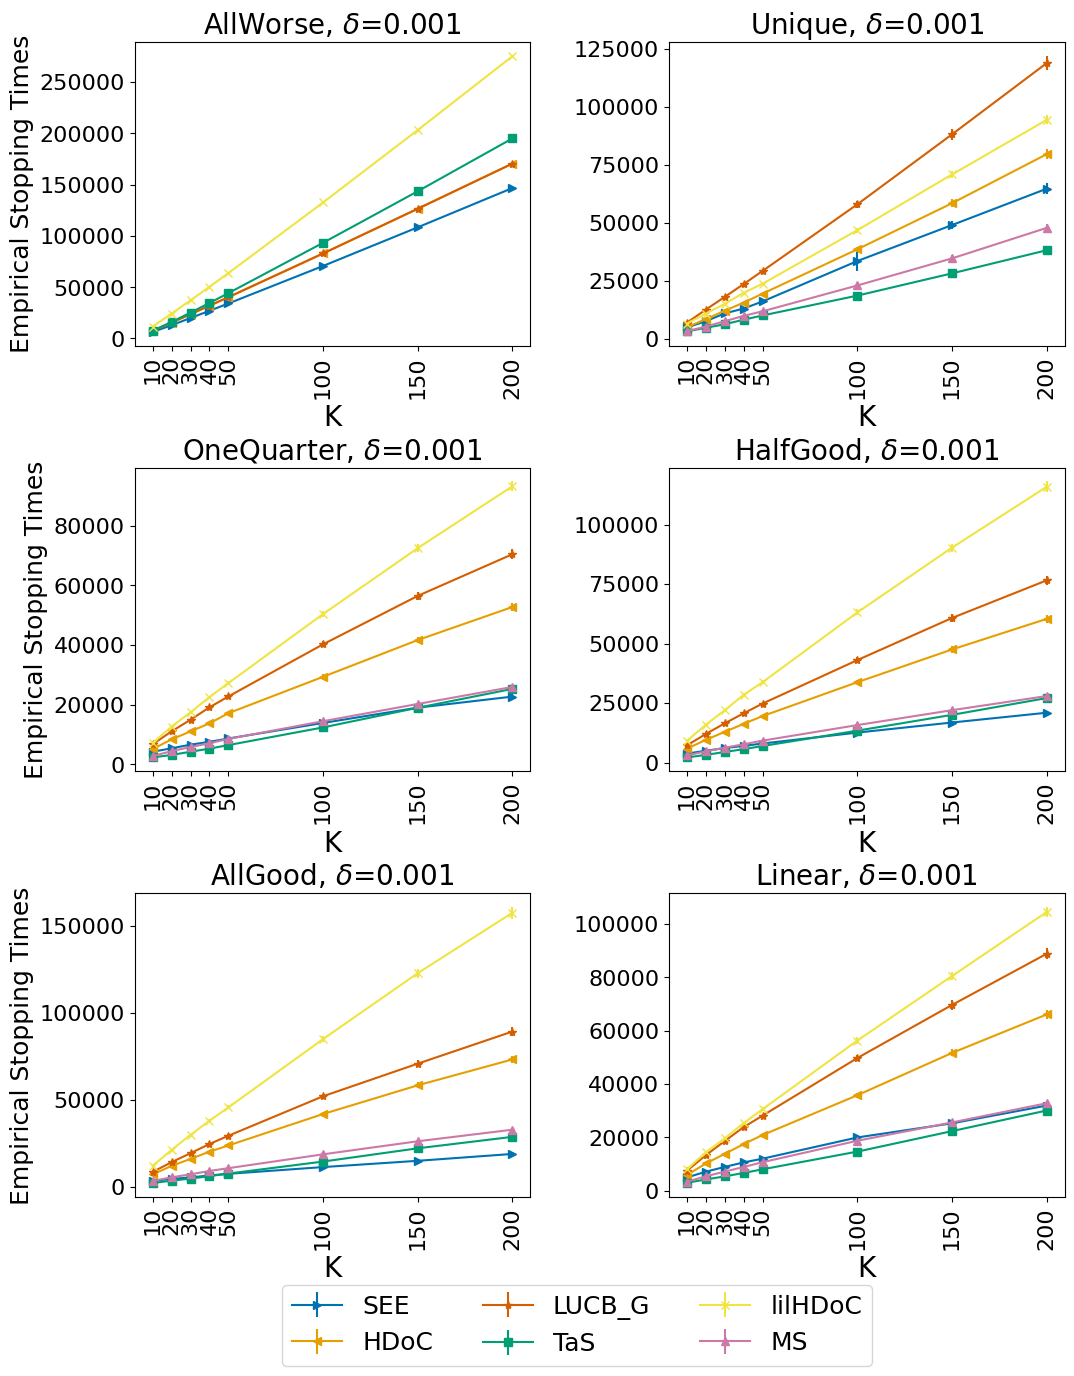

In [6]:
# output the figure
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

xlabel_fontsize = 20
ylabel_fontsize = 18
subtitle_fontsize = 20
tick_fontsize = 16
legend_fontsize = 18

nrows = 3
ncols = 2
fig, ax_ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 15))
delta_value = 0.001

agent_str_map = {
    "SEE_recycle": "SEE",
    "HDoC_Kano": "HDoC",
    "LUCB_G_Kano": "LUCB_G",
    "Adapted_TaS_new": "TaS",
    "lilHDoC": "lilHDoC",
    "MS": "MS"
}
env_str_map = {
    "AllWorse": "AllWorse", 
    "Unique_Qualified": "Unique",
    "OneQuarter_Qualified": "OneQuarter",
    "HalfGood": "HalfGood",
    "AllGood": "AllGood", 
    "Linear": "Linear",
}

colors = ['#0072B2', '#E69F00', '#D55E00', '#009E73', '#F0E442', '#CC79A7', '#000000', '#56B4E9']
markers = ['->', '-<',  '-*', '-s', '-x', '-^']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
# plt.style.use('seaborn-colorblind')

for (ii, jj), ax in np.ndenumerate(ax_):
    instance_str = instance_[ii*2+jj]
    data_temp_SEE_recycle = data_SEE_recycle[(data_SEE_recycle["delta"]==delta_value) & (data_SEE_recycle["instance_type"]==instance_str)]
    data_temp_HDoC = data_HDoC[(data_HDoC["delta"]==delta_value) & (data_HDoC["instance_type"]==instance_str)]
    data_temp_LUCB_G = data_LUCB_G[(data_LUCB_G["delta"]==delta_value) & (data_LUCB_G["instance_type"]==instance_str)]
    data_temp_Adapted_TaS = data_Adapted_TaS[(data_Adapted_TaS["delta"]==delta_value) & (data_Adapted_TaS["instance_type"]==instance_str)]
    data_temp_lilHDoC = data_lilHDoC[(data_lilHDoC["delta"]==delta_value) & (data_lilHDoC["instance_type"]==instance_str)]
    if instance_str!="AllWorse":
        data_temp_MS = data_MS[(data_MS["delta"]==delta_value) & (data_MS["instance_type"]==instance_str)]
        data_list = [
            data_temp_SEE_recycle,
            data_temp_HDoC,
            data_temp_LUCB_G,
            data_temp_Adapted_TaS,
            data_temp_lilHDoC,
            data_temp_MS
        ]
    else:
        data_list = [
            data_temp_SEE_recycle,
            data_temp_HDoC,
            data_temp_LUCB_G,
            data_temp_Adapted_TaS,
            data_temp_lilHDoC,
        ]
    
    for kk, data in enumerate(data_list):
        agent_name = agent_str_map[data["agent"].iloc[0]]
        color = colors[kk]
        marker = markers[kk]
        data_temp = data.sort_values(by="K")
        x = data_temp["K"]
        y = data_temp["mean_stop_times"]
        yerr = data_temp["std_stop_times"] * 3
        ax.errorbar(x, y, yerr=yerr, fmt=marker, color=color, label=agent_name)
        
    instance_name = env_str_map[instance_str]
    ax.set_title(f"{instance_name}, "+r"$\delta$="+ f"{delta_value}", fontsize=subtitle_fontsize)
    ax.set_xlabel("K", fontsize=xlabel_fontsize)
    if jj==0:
        ax.set_ylabel("Empirical Stopping Times", fontsize=ylabel_fontsize)
    ax.set_xticks([10, 20, 30, 40, 50, 100, 150, 200])
    ax.set_xticklabels([10, 20, 30, 40, 50, 100, 150, 200], rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
        
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.35)
handles, labels = ax_[2][1].get_legend_handles_labels()
lgd=fig.legend(handles, labels, bbox_to_anchor=(0.75,0.06), fontsize=legend_fontsize, ncol=len(handles) // 2)

plt.savefig("delta-0p001.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("delta-0p001.eps", bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

In [7]:
# plot the figure
instance_ = ["AllWorse", "Unique_Qualified", "OneQuarter_Qualified", "HalfGood", "AllGood", "Linear"]
delta_ = [0.0001]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


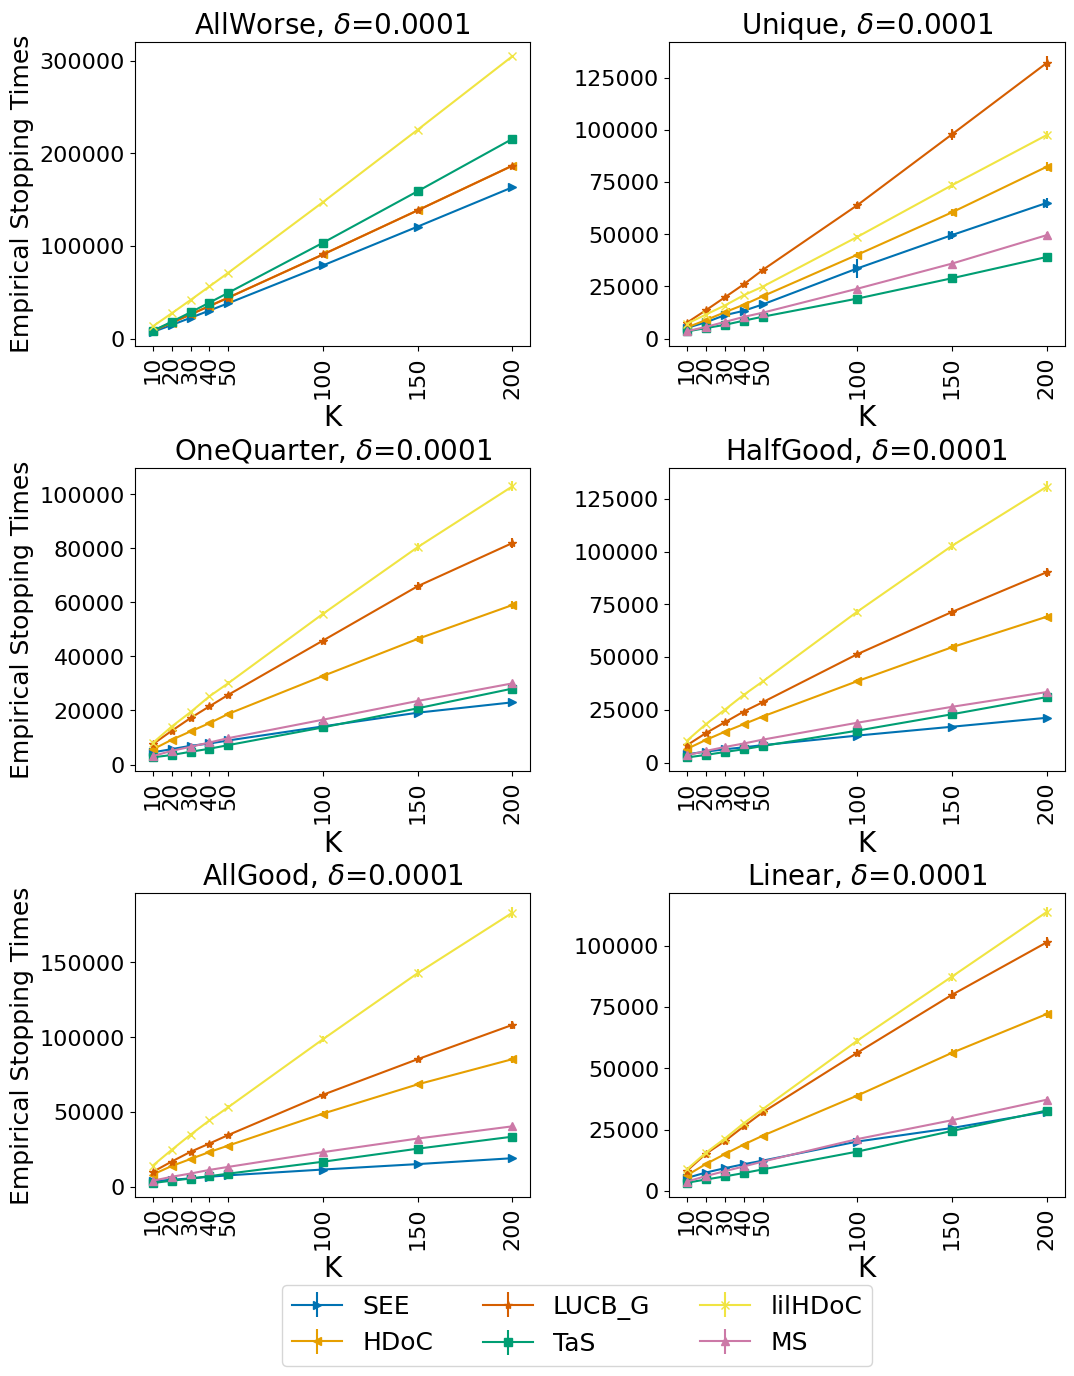

In [8]:
# output the figure
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

xlabel_fontsize = 20
ylabel_fontsize = 18
subtitle_fontsize = 20
tick_fontsize = 16
legend_fontsize = 18

nrows = 3
ncols = 2
fig, ax_ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 15))
delta_value = delta_[0]

agent_str_map = {
    "SEE_recycle": "SEE",
    "HDoC_Kano": "HDoC",
    "LUCB_G_Kano": "LUCB_G",
    "Adapted_TaS_new": "TaS",
    "lilHDoC": "lilHDoC",
    "MS": "MS"
}
env_str_map = {
    "AllWorse": "AllWorse", 
    "Unique_Qualified": "Unique",
    "OneQuarter_Qualified": "OneQuarter",
    "HalfGood": "HalfGood",
    "AllGood": "AllGood", 
    "Linear": "Linear",
}

colors = ['#0072B2', '#E69F00', '#D55E00', '#009E73', '#F0E442', '#CC79A7', '#000000', '#56B4E9']
markers = ['->', '-<',  '-*', '-s', '-x', '-^']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
# plt.style.use('seaborn-colorblind')

for (ii, jj), ax in np.ndenumerate(ax_):
    instance_str = instance_[ii*2+jj]
    data_temp_SEE_recycle = data_SEE_recycle[(data_SEE_recycle["delta"]==delta_value) & (data_SEE_recycle["instance_type"]==instance_str)]
    data_temp_HDoC = data_HDoC[(data_HDoC["delta"]==delta_value) & (data_HDoC["instance_type"]==instance_str)]
    data_temp_LUCB_G = data_LUCB_G[(data_LUCB_G["delta"]==delta_value) & (data_LUCB_G["instance_type"]==instance_str)]
    data_temp_Adapted_TaS = data_Adapted_TaS[(data_Adapted_TaS["delta"]==delta_value) & (data_Adapted_TaS["instance_type"]==instance_str)]
    data_temp_lilHDoC = data_lilHDoC[(data_lilHDoC["delta"]==delta_value) & (data_lilHDoC["instance_type"]==instance_str)]
    if instance_str!="AllWorse":
        data_temp_MS = data_MS[(data_MS["delta"]==delta_value) & (data_MS["instance_type"]==instance_str)]
        data_list = [
            data_temp_SEE_recycle,
            data_temp_HDoC,
            data_temp_LUCB_G,
            data_temp_Adapted_TaS,
            data_temp_lilHDoC,
            data_temp_MS
        ]
    else:
        data_list = [
            data_temp_SEE_recycle,
            data_temp_HDoC,
            data_temp_LUCB_G,
            data_temp_Adapted_TaS,
            data_temp_lilHDoC,
        ]
    
    for kk, data in enumerate(data_list):
        agent_name = agent_str_map[data["agent"].iloc[0]]
        color = colors[kk]
        marker = markers[kk]
        data_temp = data.sort_values(by="K")
        x = data_temp["K"]
        y = data_temp["mean_stop_times"]
        yerr = data_temp["std_stop_times"] * 3
        ax.errorbar(x, y, yerr=yerr, fmt=marker, color=color, label=agent_name)
        
    instance_name = env_str_map[instance_str]
    ax.set_title(f"{instance_name}, "+r"$\delta$="+ f"{delta_value}", fontsize=subtitle_fontsize)
    ax.set_xlabel("K", fontsize=xlabel_fontsize)
    if jj==0:
        ax.set_ylabel("Empirical Stopping Times", fontsize=ylabel_fontsize)
    ax.set_xticks([10, 20, 30, 40, 50, 100, 150, 200])
    ax.set_xticklabels([10, 20, 30, 40, 50, 100, 150, 200], rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
        
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.35)
handles, labels = ax_[2][1].get_legend_handles_labels()
lgd=fig.legend(handles, labels, bbox_to_anchor=(0.75,0.06), fontsize=legend_fontsize, ncol=len(handles) // 2)

plt.savefig("delta-0p0001.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("delta-0p0001.eps", bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


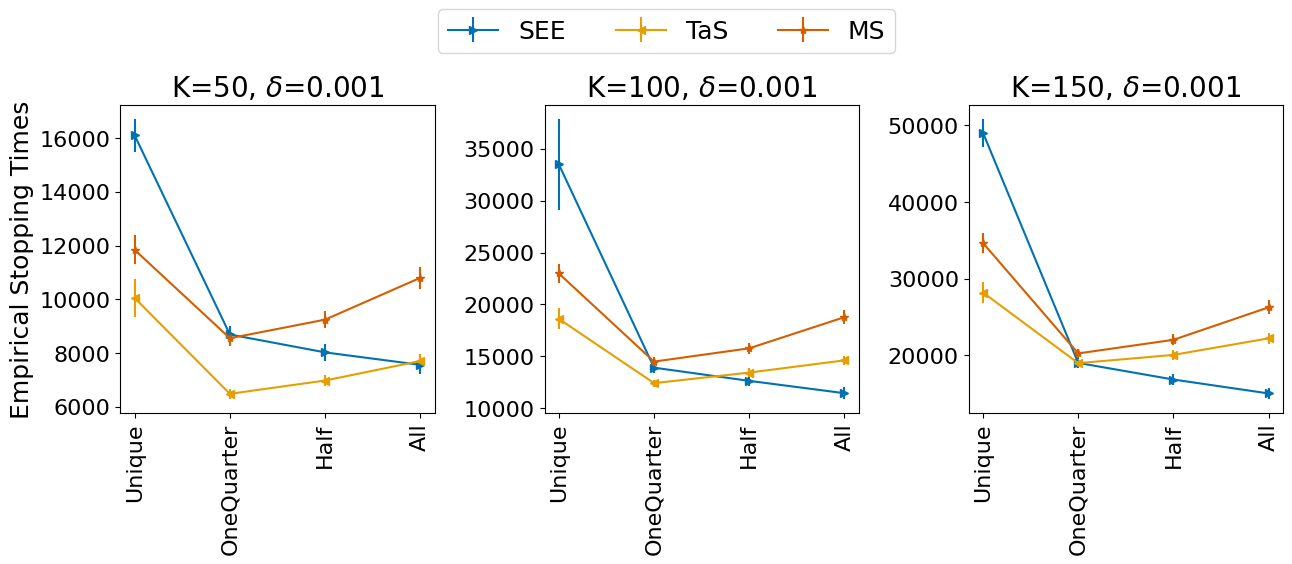

In [9]:
# as the proportion of qualified arm increases, delta=0.001

agent_str_map = {
    "SEE_recycle": "SEE",
    "HDoC_Kano": "HDoC",
    "LUCB_G_Kano": "LUCB_G",
    "Adapted_TaS_new": "TaS",
    "lilHDoC": "lilHDoC",
    "MS": "MS"
}
env_str_map = {
    "AllWorse": "AllWorse", 
    "Unique_Qualified": "Unique",
    "OneQuarter_Qualified": "OneQuarter",
    "HalfGood": "HalfGood",
    "AllGood": "AllGood", 
    "Linear": "Linear",
}
K_ = [50, 100, 150]
instance_ = ['Unique_Qualified', 'OneQuarter_Qualified', 'HalfGood', 'AllGood'] 
delta_value = 0.001

nrows = 1
ncols = len(K_)
fig, ax_ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4))

for jj, ax in enumerate(ax_):
    k_value = K_[jj]
    data_temp_SEE_recycle = data_SEE_recycle[(data_SEE_recycle["delta"]==delta_value) & (data_SEE_recycle["instance_type"].isin(instance_)) & (data_SEE_recycle["K"]==k_value)].copy()
    data_temp_Adapted_TaS = data_Adapted_TaS[(data_Adapted_TaS["delta"]==delta_value) & (data_Adapted_TaS["instance_type"].isin(instance_)) & (data_Adapted_TaS["K"]==k_value)].copy()
    data_temp_MS = data_MS[(data_MS["delta"]==delta_value) & (data_MS["instance_type"].isin(instance_)) & (data_MS["K"]==k_value)].copy()

    # create a new column by the corresponding proportion
    data_list_ = [
        data_temp_SEE_recycle,
        data_temp_Adapted_TaS,
        data_temp_MS
    ]
    replace_dict = {
        'Unique_Qualified': 0,
        'OneQuarter_Qualified': 1,
        'HalfGood': 2,
        'AllGood': 3
    }
    for data_temp in data_list_:
        data_temp["arm_proportion"] = data_temp["instance_type"].map(replace_dict)

    # sort the rows by the new column
    for kk, data in enumerate(data_list_):
        agent_name = agent_str_map[data["agent"].iloc[0]]
        color = colors[kk]
        marker = markers[kk]
        data_temp = data.sort_values(by="arm_proportion")
        x = [0, 1, 2, 3]
        y = data_temp["mean_stop_times"]
        yerr = data_temp["std_stop_times"] * 3
        ax.errorbar(x, y, yerr=yerr, fmt=marker, color=color, label=agent_name)

    instance_name = env_str_map[instance_str]
    ax.set_title(f"K={k_value}, "+r"$\delta$="+ f"{delta_value}", fontsize=subtitle_fontsize)
    # ax.set_xlabel("K", fontsize=xlabel_fontsize)
    if jj==0:
        ax.set_ylabel("Empirical Stopping Times", fontsize=ylabel_fontsize)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(["Unique", "OneQuarter", "Half", "All"], rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.35)
handles, labels = ax_[-1].get_legend_handles_labels()
lgd=fig.legend(handles, labels, bbox_to_anchor=(0.65,1.15), fontsize=legend_fontsize, ncol=len(handles))

plt.savefig("delta-0p001_proportion.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("delta-0p001_proportion.eps", bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


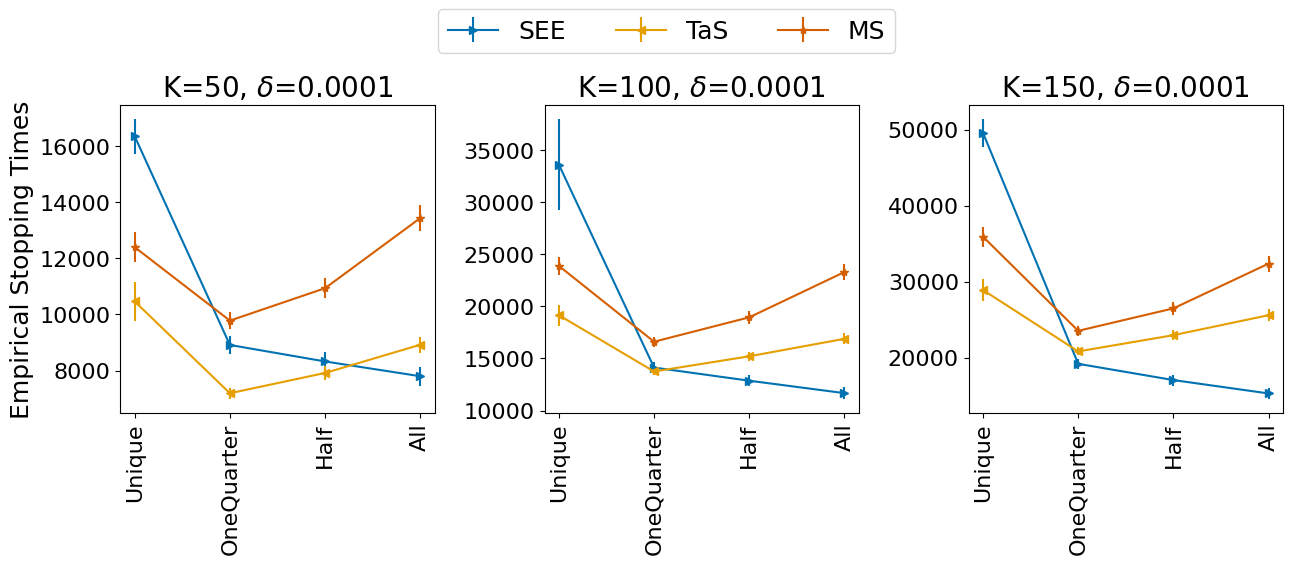

In [10]:
# as the proportion of qualified arm increases, delta=0.0001

agent_str_map = {
    "SEE_recycle": "SEE",
    "HDoC_Kano": "HDoC",
    "LUCB_G_Kano": "LUCB_G",
    "Adapted_TaS_new": "TaS",
    "lilHDoC": "lilHDoC",
    "MS": "MS"
}
env_str_map = {
    "AllWorse": "AllWorse", 
    "Unique_Qualified": "Unique",
    "OneQuarter_Qualified": "OneQuarter",
    "HalfGood": "HalfGood",
    "AllGood": "AllGood", 
    "Linear": "Linear",
}
K_ = [50, 100, 150]
instance_ = ['Unique_Qualified', 'OneQuarter_Qualified', 'HalfGood', 'AllGood'] 
delta_value = 0.0001

nrows = 1
ncols = len(K_)
fig, ax_ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4))

for jj, ax in enumerate(ax_):
    k_value = K_[jj]
    data_temp_SEE_recycle = data_SEE_recycle[(data_SEE_recycle["delta"]==delta_value) & (data_SEE_recycle["instance_type"].isin(instance_)) & (data_SEE_recycle["K"]==k_value)].copy()
    data_temp_Adapted_TaS = data_Adapted_TaS[(data_Adapted_TaS["delta"]==delta_value) & (data_Adapted_TaS["instance_type"].isin(instance_)) & (data_Adapted_TaS["K"]==k_value)].copy()
    data_temp_MS = data_MS[(data_MS["delta"]==delta_value) & (data_MS["instance_type"].isin(instance_)) & (data_MS["K"]==k_value)].copy()

    # create a new column by the corresponding proportion
    data_list_ = [
        data_temp_SEE_recycle,
        data_temp_Adapted_TaS,
        data_temp_MS
    ]
    replace_dict = {
        'Unique_Qualified': 0,
        'OneQuarter_Qualified': 1,
        'HalfGood': 2,
        'AllGood': 3
    }
    for data_temp in data_list_:
        data_temp["arm_proportion"] = data_temp["instance_type"].map(replace_dict)

    # sort the rows by the new column
    for kk, data in enumerate(data_list_):
        agent_name = agent_str_map[data["agent"].iloc[0]]
        color = colors[kk]
        marker = markers[kk]
        data_temp = data.sort_values(by="arm_proportion")
        x = [0, 1, 2, 3]
        y = data_temp["mean_stop_times"]
        yerr = data_temp["std_stop_times"] * 3
        ax.errorbar(x, y, yerr=yerr, fmt=marker, color=color, label=agent_name)

    instance_name = env_str_map[instance_str]
    ax.set_title(f"K={k_value}, "+r"$\delta$="+ f"{delta_value}", fontsize=subtitle_fontsize)
    # ax.set_xlabel("K", fontsize=xlabel_fontsize)
    if jj==0:
        ax.set_ylabel("Empirical Stopping Times", fontsize=ylabel_fontsize)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(["Unique", "OneQuarter", "Half", "All"], rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.35)
handles, labels = ax_[-1].get_legend_handles_labels()
lgd=fig.legend(handles, labels, bbox_to_anchor=(0.65,1.15), fontsize=legend_fontsize, ncol=len(handles))

plt.savefig("delta-0p0001_proportion.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("delta-0p0001_proportion.eps", bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()